In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import os, shutil

DIR = "Dataset"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1, subset="training", seed=42, batch_size=32, smart_resize=True, image_size=(256, 256))
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1, subset="validation", seed=42, batch_size=32, smart_resize=True, image_size=(256, 256))

Found 23471 files belonging to 5 classes.
Using 21124 files for training.
Found 23471 files belonging to 5 classes.
Using 2347 files for validation.


In [2]:
print(test_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [3]:
classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes)

['Bacterial Pneumonia', 'COVID', 'Normal', 'Tuberculosis', 'Viral Pneumonia']


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
print(type(test_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [6]:
model = tf.keras.models.load_model("models/model_MobileNet.h5")

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 128, 128, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

 expanded_conv_1/depthwise/Batc  (None, 32, 32, 72)  288         ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, 32, 32, 72)   0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 32, 32, 24)  1728        ['re_lu_4[0][0]']                
 D)                                                                                               
                                                                                                  
 expanded_conv_1/project/BatchN  (None, 32, 32, 24)  96          ['expanded_conv_1/project[0][0]']
 orm (Batc

                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    2400        ['expanded_conv_3/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__oper

                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 16, 16, 240)  0          ['multiply_4[0][0]',             
 /Mul (Multiply)                                                  'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, 16, 16, 40)  9600        ['expanded_conv_4/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_4/project/BatchN  (None, 16, 16, 40)  160         ['expanded_conv_4/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_

                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 16, 16, 120)  4800       ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 16, 16, 120)  480        ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_11 (TFOpL  (None, 16, 16, 120)  0          ['expanded_conv_6/expand/BatchNor
 ambda)                                                          m[0][0]']                        
          

                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_14[0][0]']    
                                                                                                  
 expanded_conv_7/depthwise (Dep  (None, 16, 16, 144)  3600       ['multiply_9[0][0]']             
 thwiseConv2D)                                                                                    
                                                                                                  
 expanded_conv_7/depthwise/Batc  (None, 16, 16, 144)  576        ['expanded_conv_7/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 16, 16, 144)  0          ['expanded_conv_7/depthwise/Batch
 ambda)   

 tf.__operators__.add_18 (TFOpL  (None, 8, 8, 288)   0           ['expanded_conv_8/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_23 (ReLU)                (None, 8, 8, 288)    0           ['tf.__operators__.add_18[0][0]']
                                                                                                  
 tf.math.multiply_18 (TFOpLambd  (None, 8, 8, 288)   0           ['re_lu_23[0][0]']               
 a)                                                                                               
                                                                                                  
 multiply_12 (Multiply)         (None, 8, 8, 288)    0           ['expanded_conv_8/depthwise/Batch
                                                                 Norm[0][0]',                     
          

 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 144)   0           ['expanded_conv_9/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 576)   83520       ['expanded_conv_9/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__operators__.add_22 (TFOpL  (None, 1, 1, 576)   0           ['expanded_conv_9/squeeze_excite/
 ambda)                                                          Conv_1[0][0]']                   
          

                                                                                                  
 tf.math.multiply_25 (TFOpLambd  (None, 1, 1, 576)   0           ['re_lu_30[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 8, 8, 576)   0           ['multiply_16[0][0]',            
 e/Mul (Multiply)                                                 'tf.math.multiply_25[0][0]']    
                                                                                                  
 expanded_conv_10/project (Conv  (None, 8, 8, 96)    55296       ['expanded_conv_10/squeeze_excite
 2D)                                                             /Mul[0][0]']                     
                                                                                                  
 expanded_

[1.4344351e-03 9.9984230e+01 6.6069777e-05 7.8041973e-03 6.4618536e-03] 
 ['Bacterial Pneumonia', 'COVID', 'Normal', 'Tuberculosis', 'Viral Pneumonia']
Prediction:  COVID 99.98422861099243%


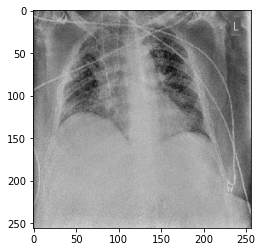

In [8]:
path = "Dataset/COVID/0cd9fcb6.png"
#path = "../Dataset/Normal/Normal-1000.png"

img = tf.keras.preprocessing.image.load_img(path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)

plt.imshow(img)
print(predictions[0]*100, "\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")


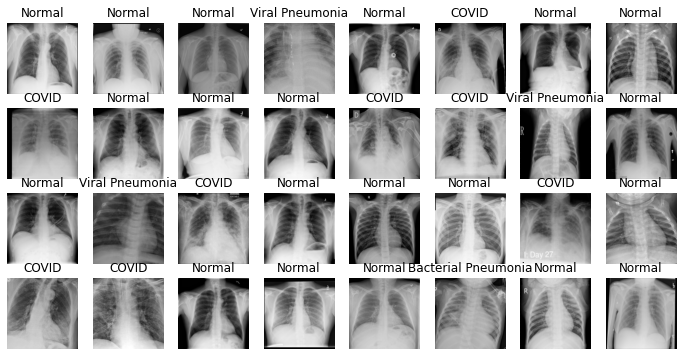

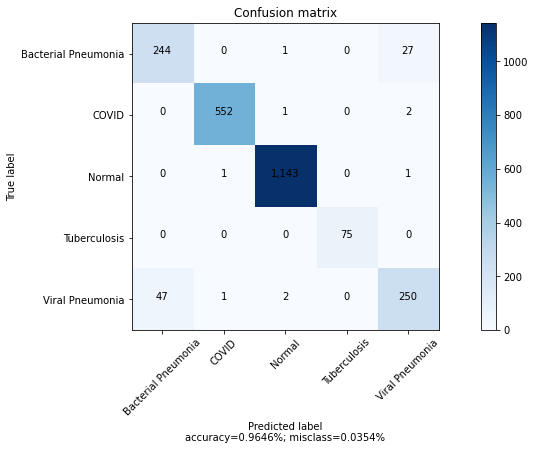

In [9]:
def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy, misclass))
    plt.savefig("mblnet_cm.png")
    plt.show()

plt.figure(figsize=(12, 6))
true = []
predictions1 = []

for images, labels in test_dataset.take(1900):
  pred = model.predict(images)
  for i in range(32):
    try:
      ax = plt.subplot(4, 8, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      #print(classes[np.argmax(pred[i])], 100 * np.max(pred[i]), "real = " + str(classes[labels[i]]))

      true.append(labels[i])
      predictions1.append(np.argmax(pred[i]))

      plt.title(classes[labels[i]])
      plt.axis("off")
    except:
      print()

plot_confusion_matrix(tf.math.confusion_matrix(true, predictions1), classes)

In [10]:
from sklearn import metrics

print(metrics.classification_report(true, predictions1,target_names=classes ,digits=3,zero_division=0))

                     precision    recall  f1-score   support

Bacterial Pneumonia      0.838     0.897     0.867       272
              COVID      0.996     0.995     0.995       555
             Normal      0.997     0.998     0.997      1145
       Tuberculosis      1.000     1.000     1.000        75
    Viral Pneumonia      0.893     0.833     0.862       300

           accuracy                          0.965      2347
          macro avg      0.945     0.945     0.944      2347
       weighted avg      0.965     0.965     0.965      2347



In [11]:
path = "Dataset"
for i in os.listdir(path):
  folderPath = os.path.join(path, i)
  for j in os.listdir(folderPath)[:]:
    fullPath = os.path.join(folderPath, j)
    print(i, classes.index(i))

Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial 

Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial 

Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial 

COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculos

Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneu

Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneu

Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneu

(1, 256, 256, 3)
(1, 128, 128, 16)
(1, 128, 128, 16)
(1, 128, 128, 16)
(1, 128, 128, 16)
(1, 128, 128, 16)
(1, 128, 128, 16)
(1, 129, 129, 16)
(1, 64, 64, 16)
(1, 64, 64, 16)
(1, 64, 64, 16)
(1, 1, 1, 16)
(1, 1, 1, 8)
(1, 1, 1, 8)
(1, 1, 1, 16)
(1, 1, 1, 16)
(1, 1, 1, 16)
(1, 1, 1, 16)
(1, 64, 64, 16)
(1, 64, 64, 16)
(1, 64, 64, 16)


C:\Users\soumy\AppData\Local\Temp/ipykernel_20192/93806013.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(scale * n_features, scale) )


(1, 64, 64, 72)
(1, 64, 64, 72)
(1, 64, 64, 72)
(1, 65, 65, 72)
(1, 32, 32, 72)
(1, 32, 32, 72)
(1, 32, 32, 72)
(1, 32, 32, 24)
(1, 32, 32, 24)
(1, 32, 32, 88)
(1, 32, 32, 88)
(1, 32, 32, 88)
(1, 32, 32, 88)


C:\Users\soumy\AppData\Local\Temp/ipykernel_20192/93806013.py:26: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std()


(1, 32, 32, 88)
(1, 32, 32, 88)
(1, 32, 32, 24)
(1, 32, 32, 24)
(1, 32, 32, 24)
(1, 32, 32, 96)
(1, 32, 32, 96)
(1, 32, 32, 96)
(1, 32, 32, 96)
(1, 32, 32, 96)
(1, 32, 32, 96)
(1, 35, 35, 96)
(1, 16, 16, 96)
(1, 16, 16, 96)
(1, 16, 16, 96)
(1, 16, 16, 96)
(1, 16, 16, 96)
(1, 16, 16, 96)
(1, 1, 1, 96)
(1, 1, 1, 24)
(1, 1, 1, 24)
(1, 1, 1, 96)
(1, 1, 1, 96)
(1, 1, 1, 96)
(1, 1, 1, 96)
(1, 16, 16, 96)
(1, 16, 16, 40)
(1, 16, 16, 40)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 1, 1, 240)
(1, 1, 1, 64)
(1, 1, 1, 64)
(1, 1, 1, 240)
(1, 1, 1, 240)
(1, 1, 1, 240)
(1, 1, 1, 240)
(1, 16, 16, 240)
(1, 16, 16, 40)
(1, 16, 16, 40)
(1, 16, 16, 40)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16, 16, 240)
(1, 16,

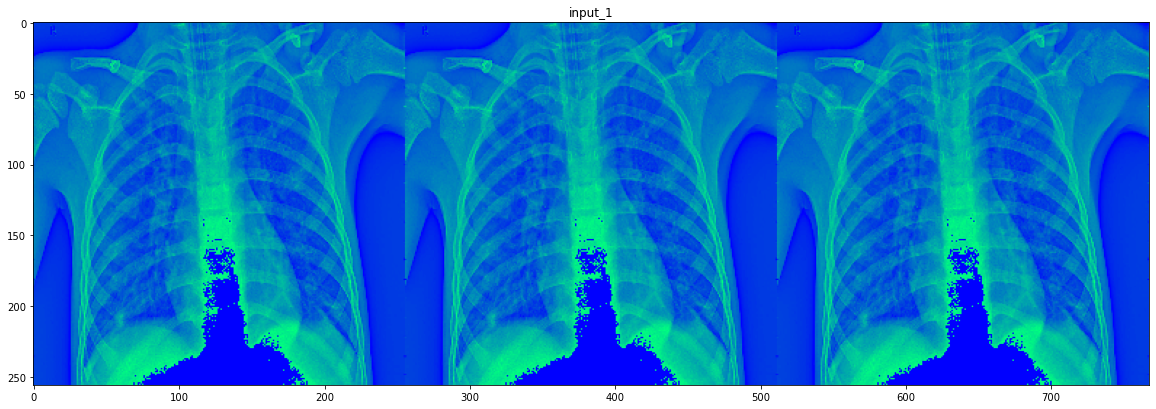

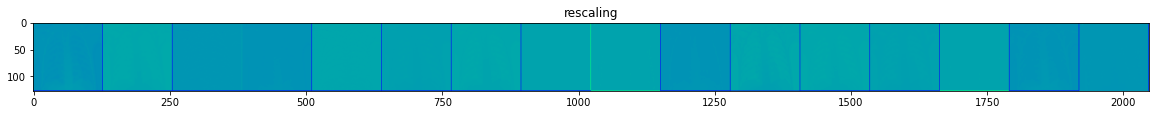

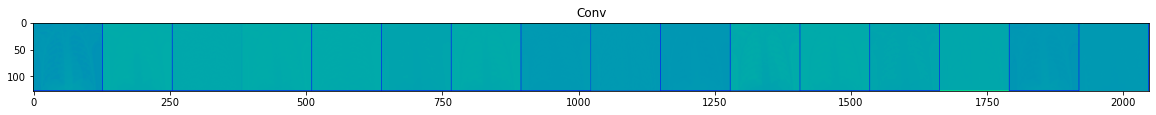

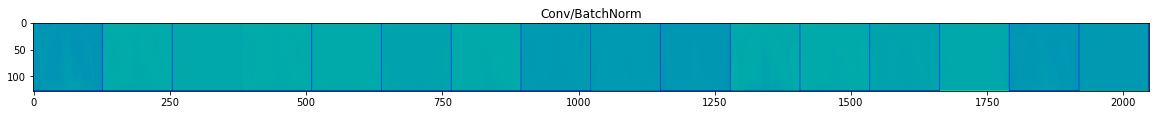

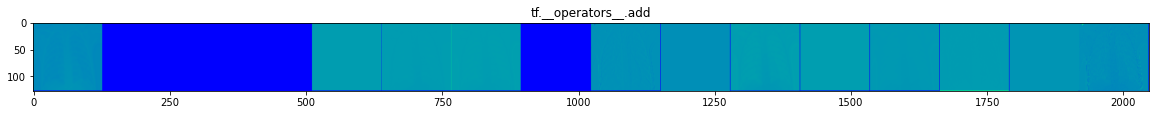

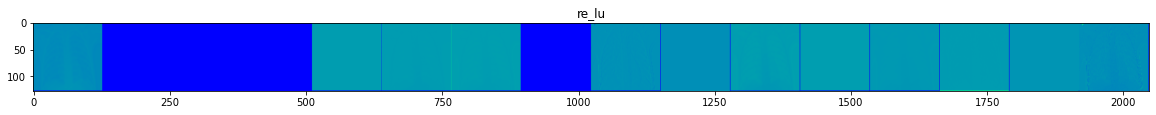

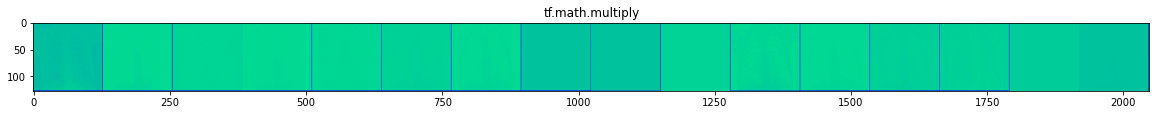

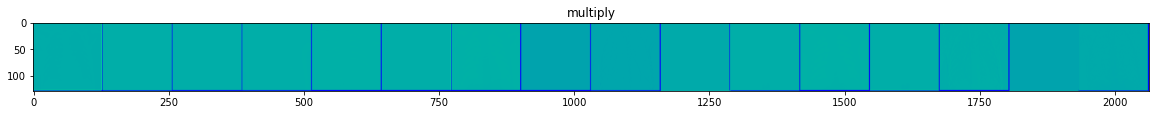

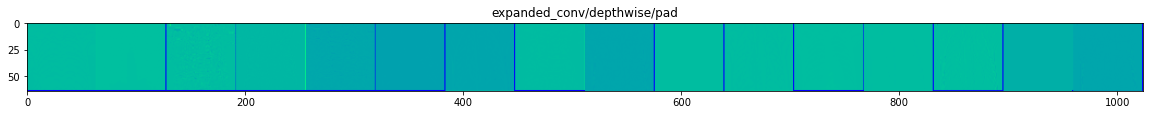

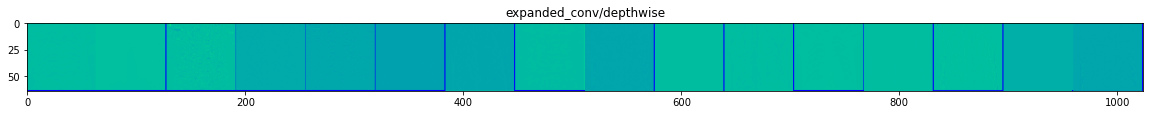

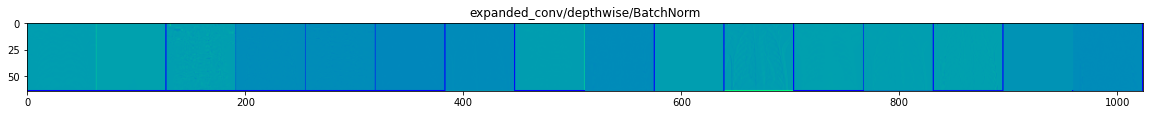

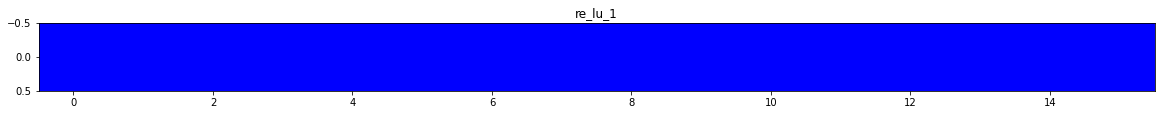

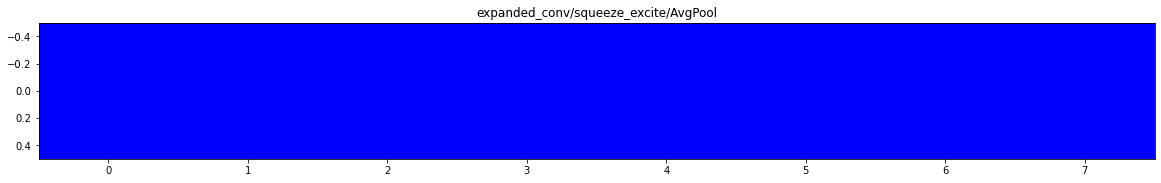

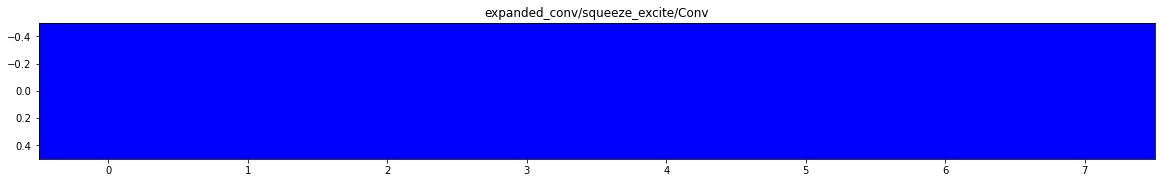

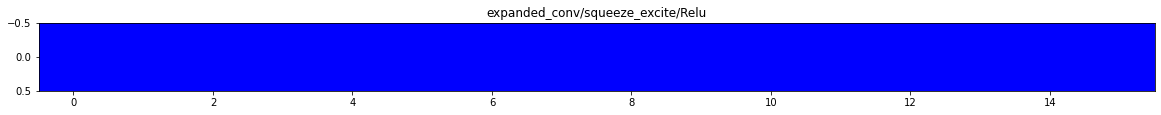

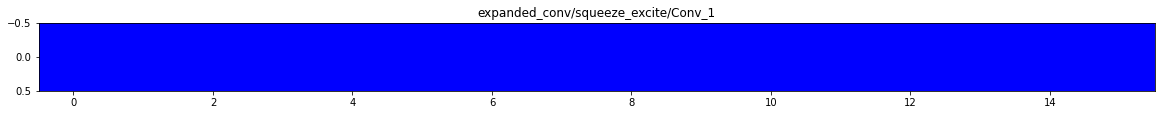

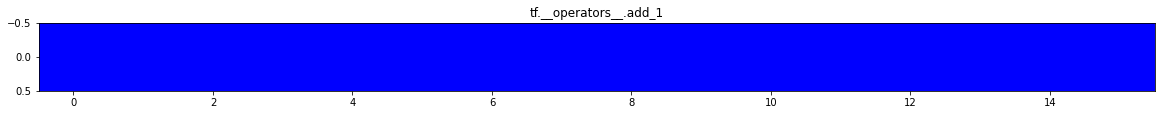

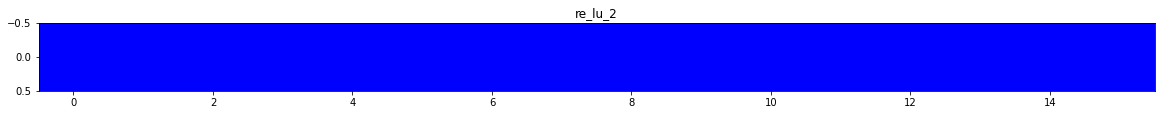

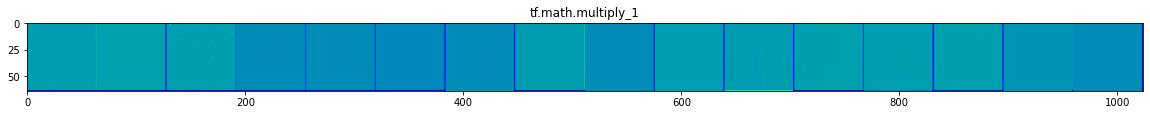

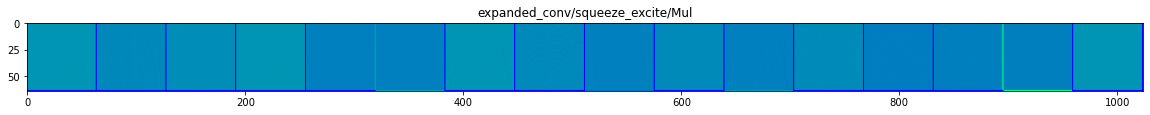

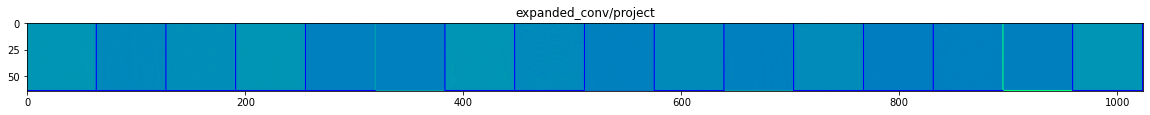

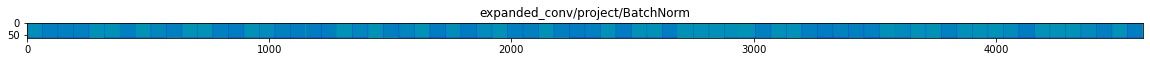

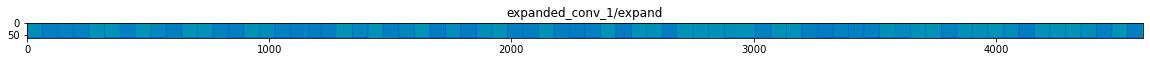

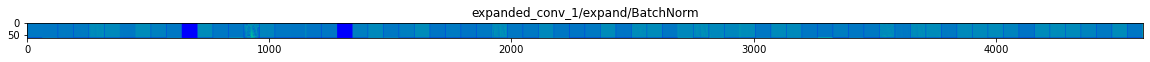

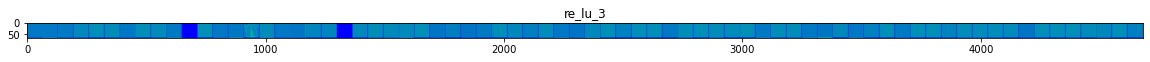

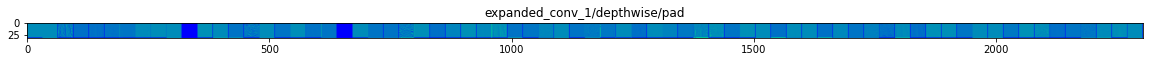

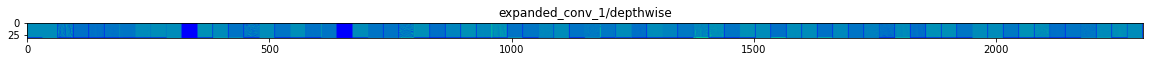

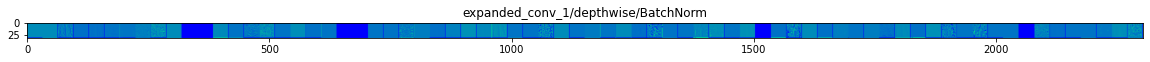

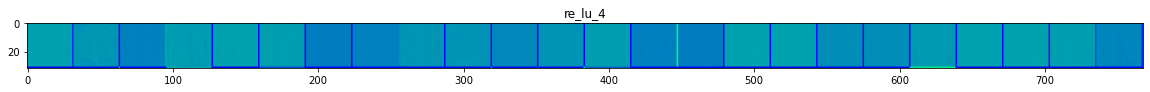

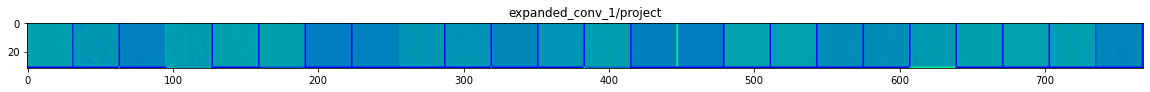

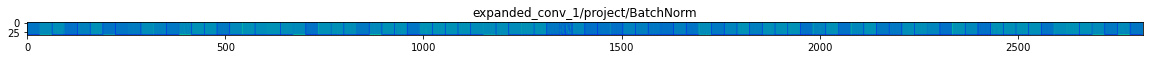

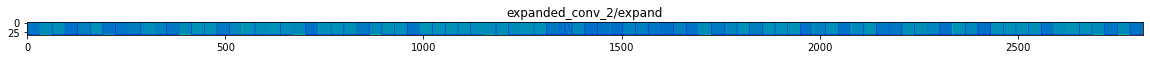

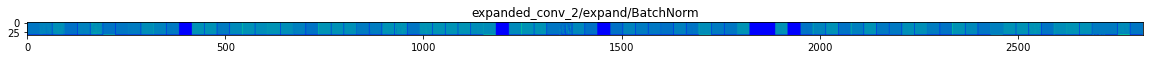

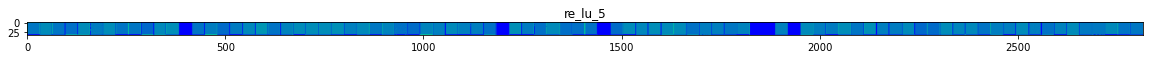

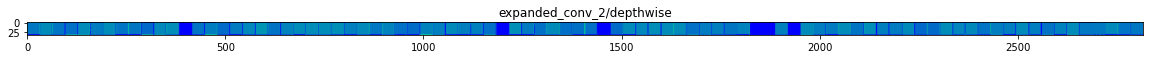

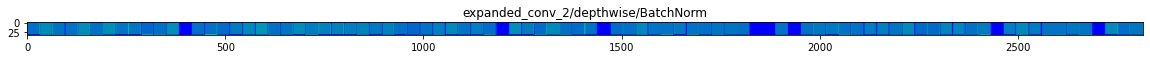

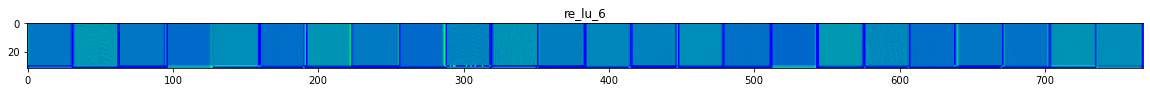

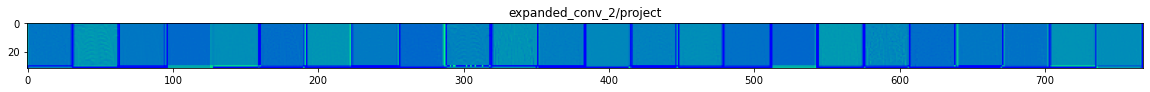

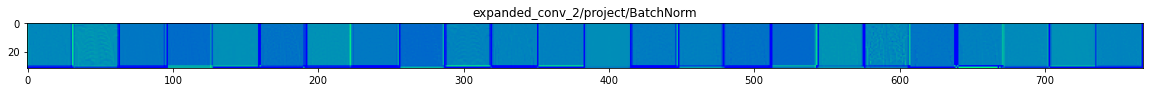

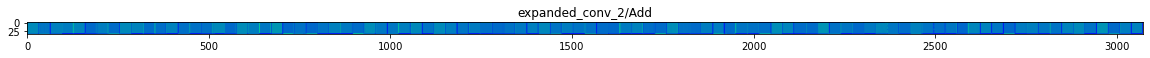

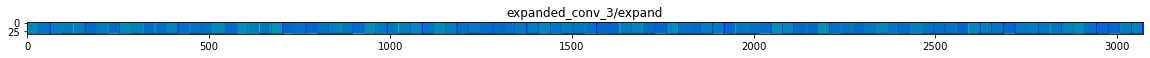

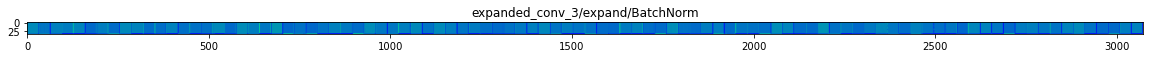

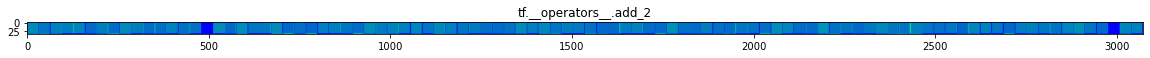

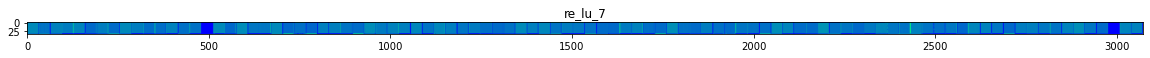

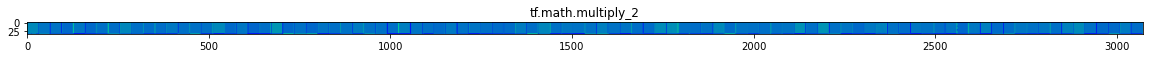

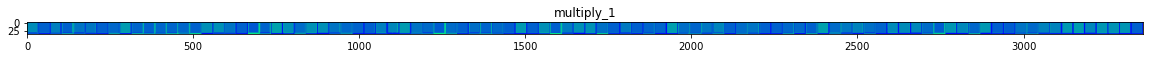

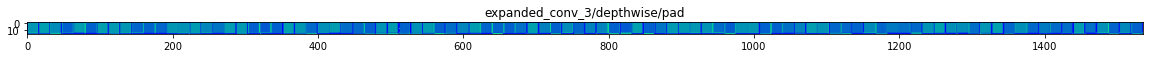

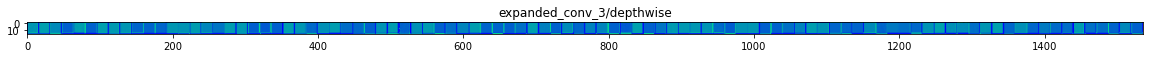

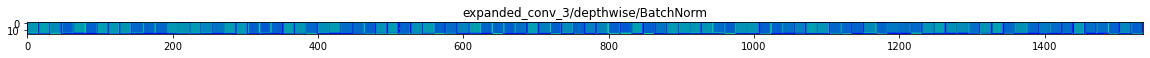

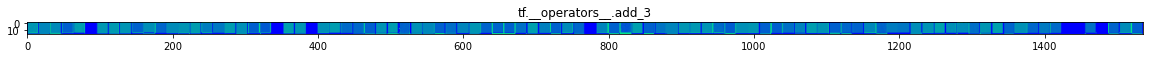

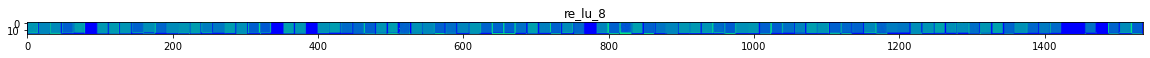

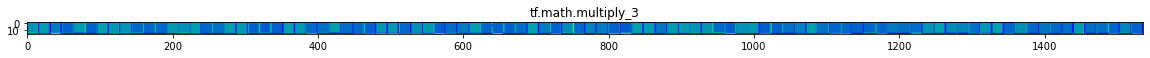

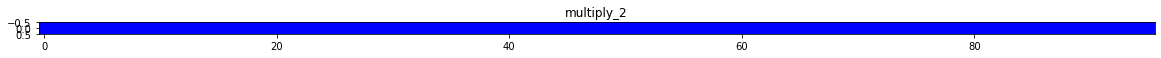

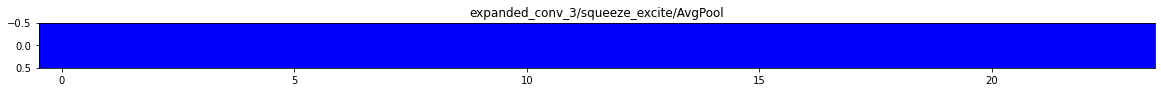

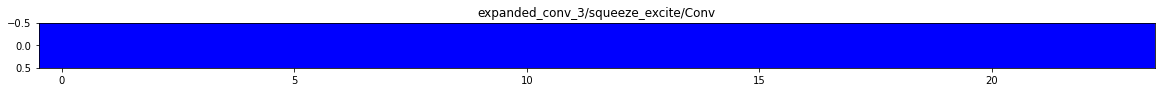

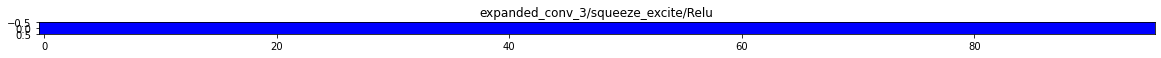

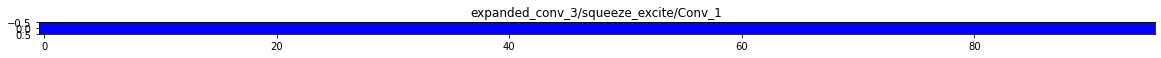

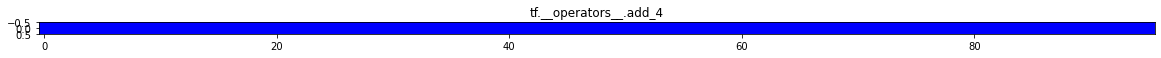

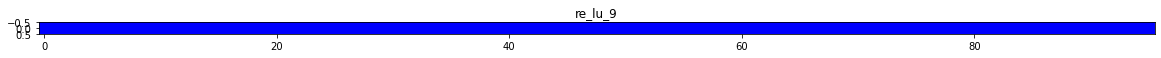

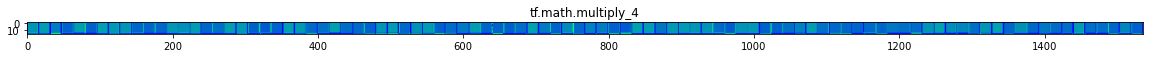

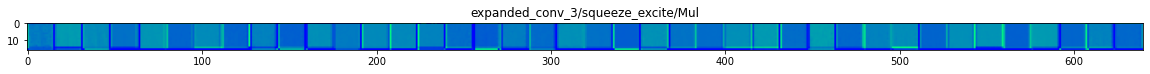

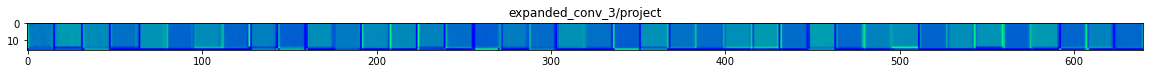

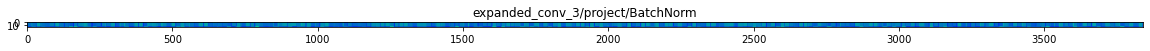

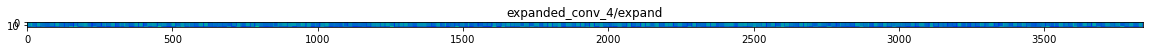

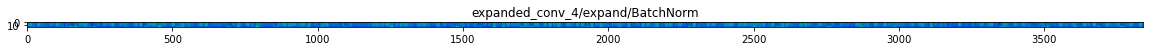

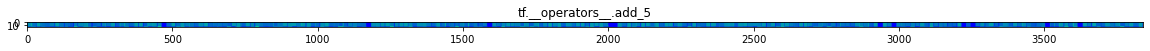

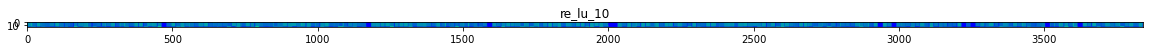

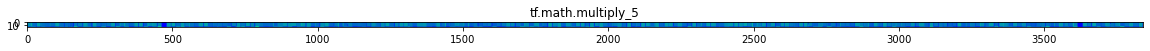

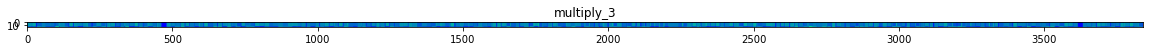

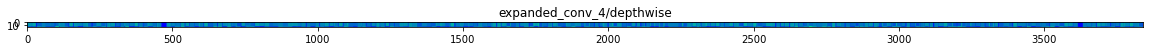

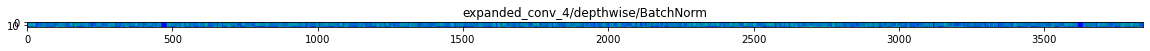

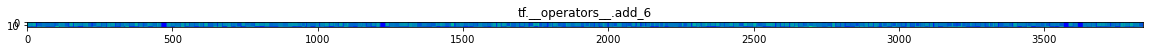

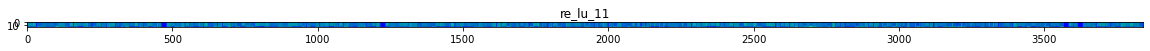

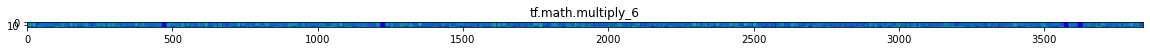

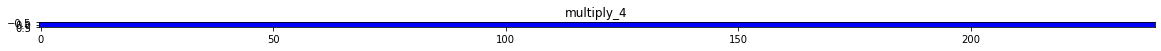

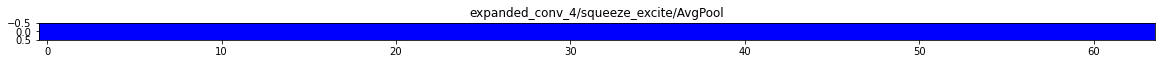

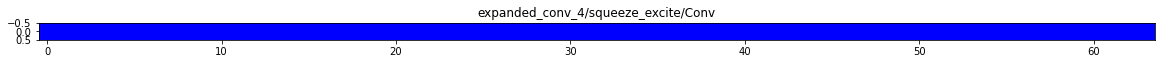

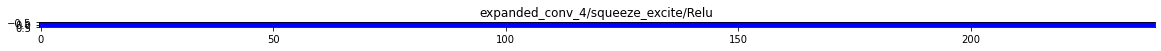

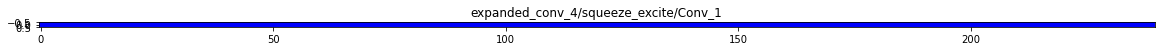

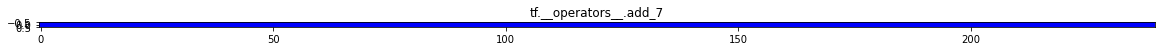

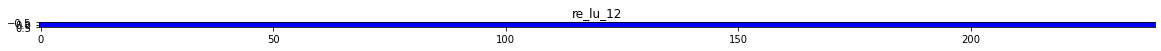

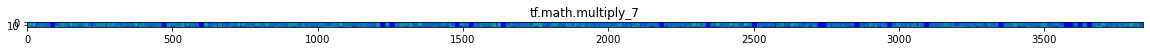

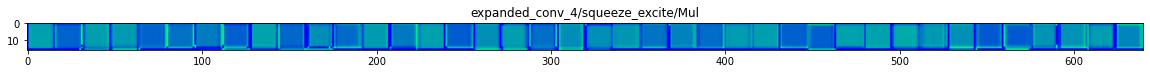

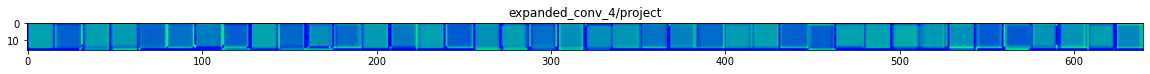

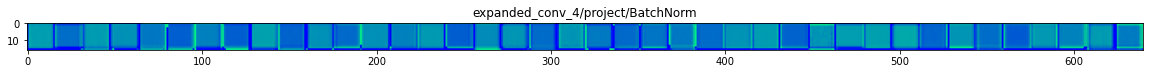

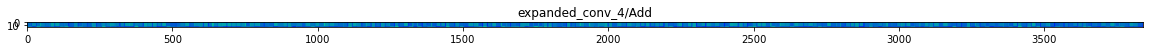

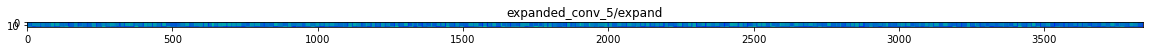

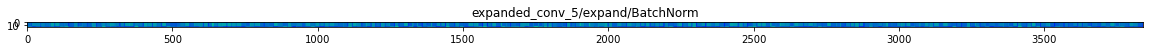

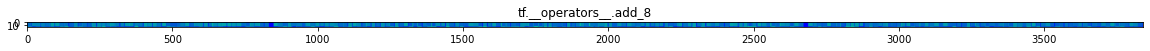

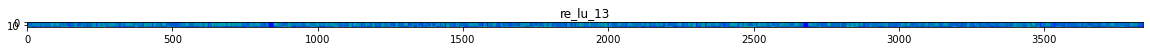

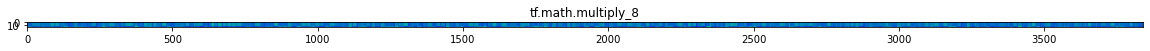

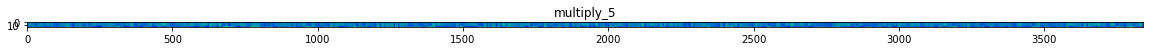

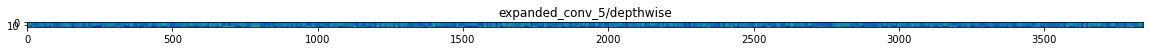

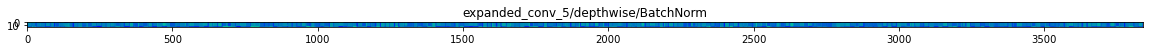

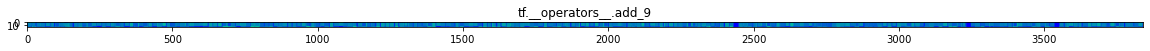

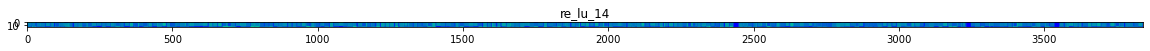

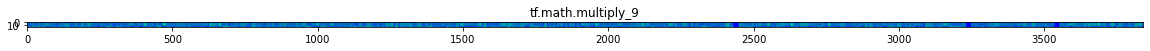

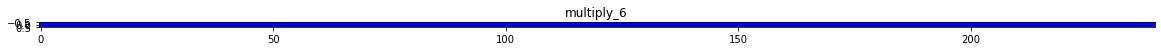

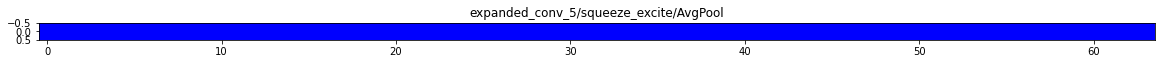

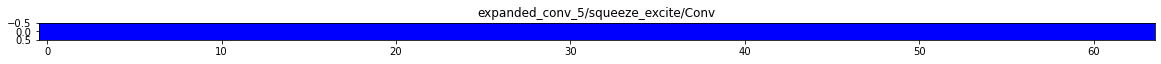

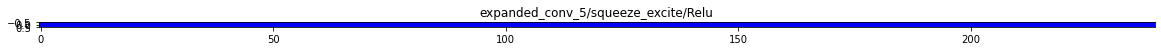

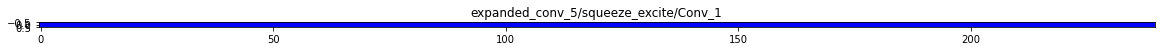

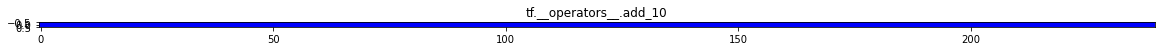

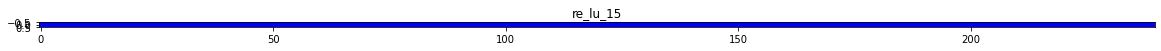

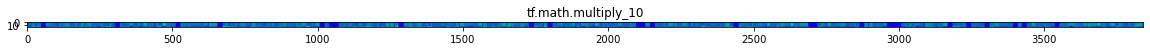

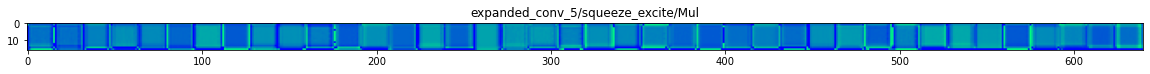

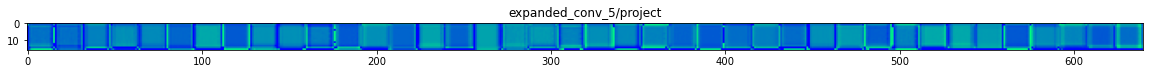

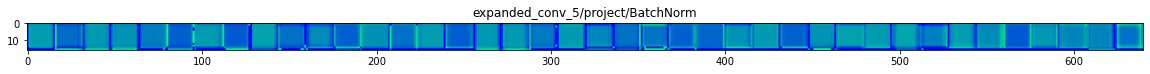

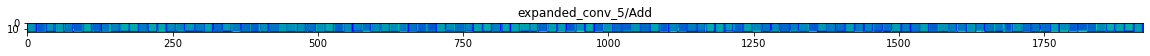

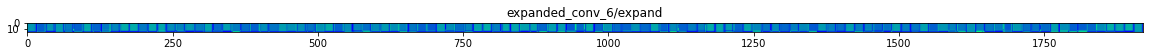

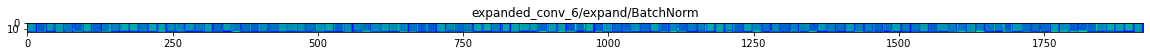

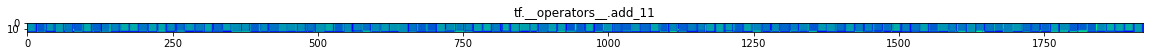

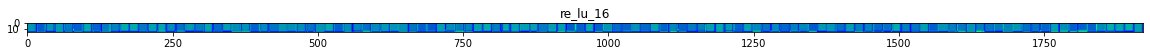

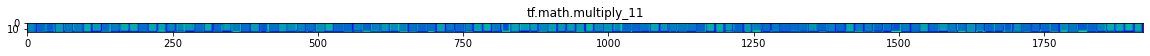

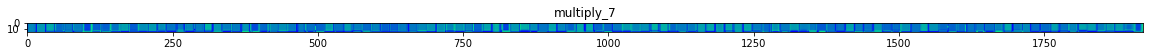

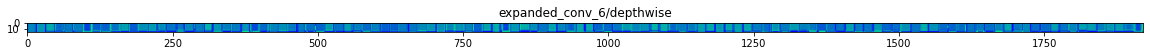

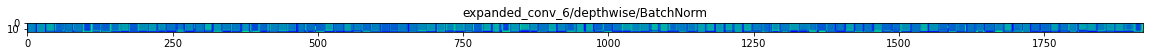

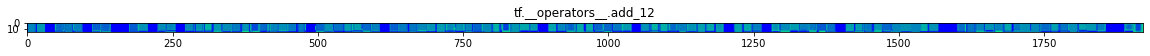

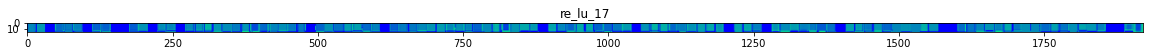

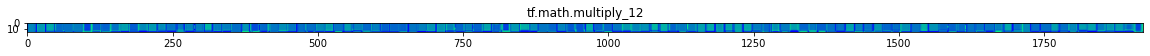

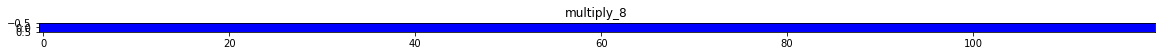

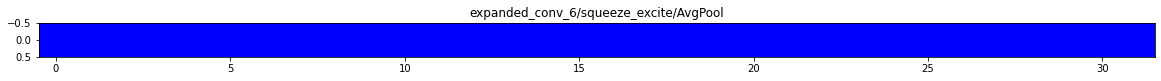

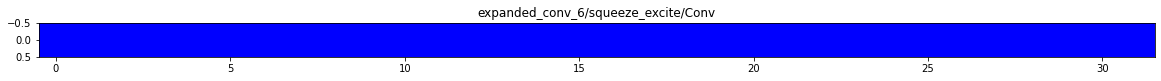

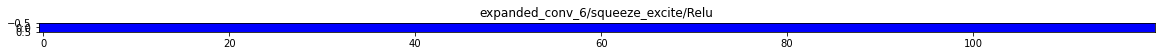

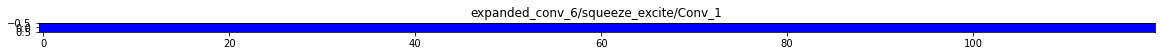

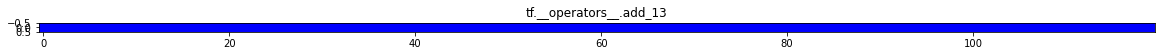

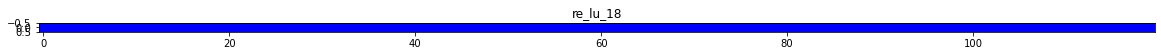

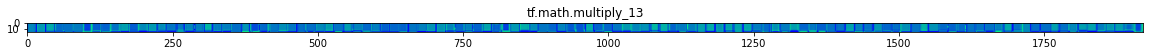

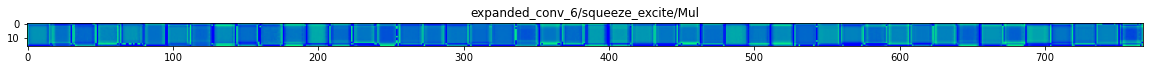

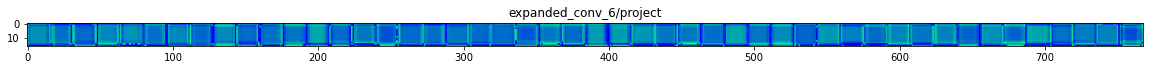

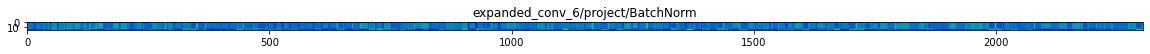

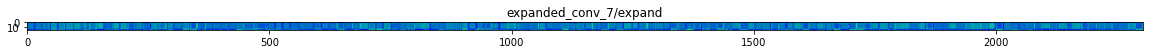

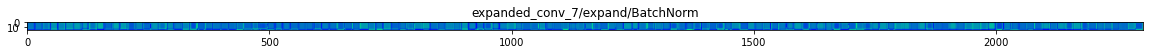

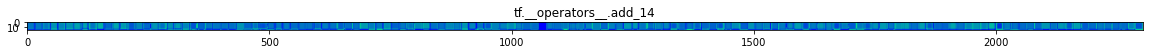

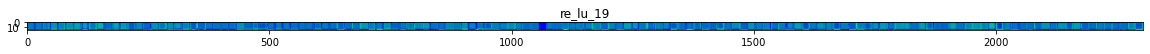

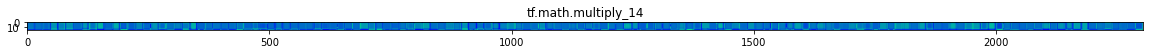

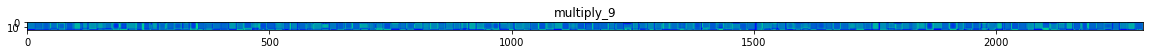

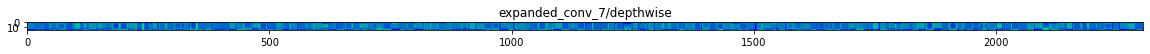

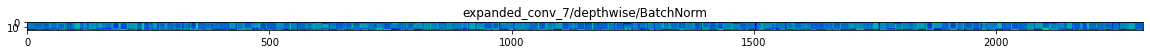

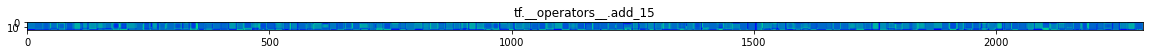

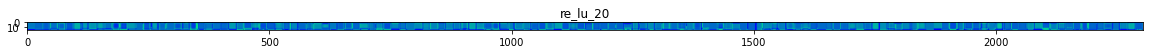

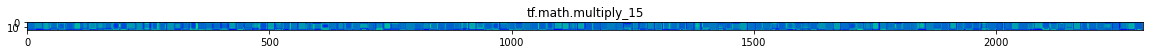

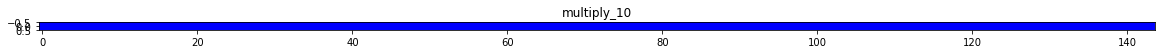

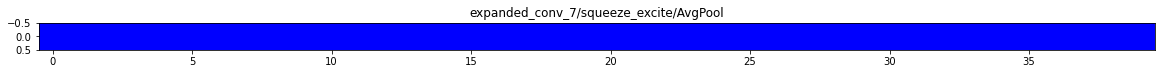

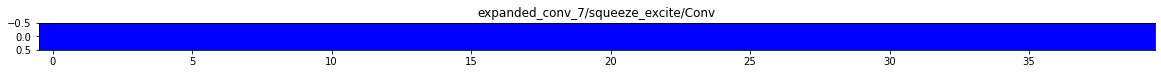

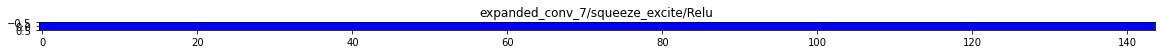

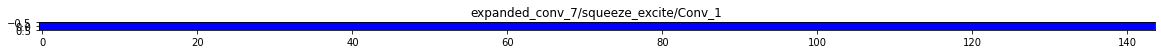

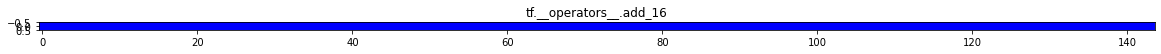

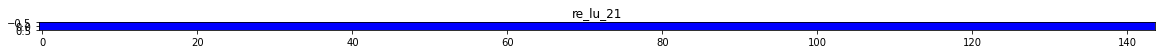

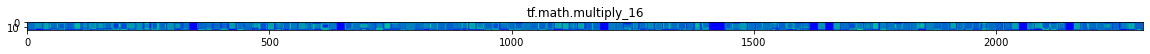

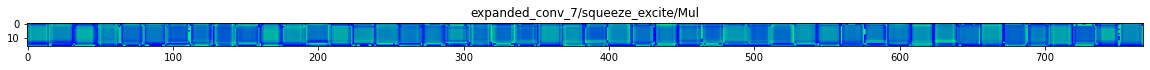

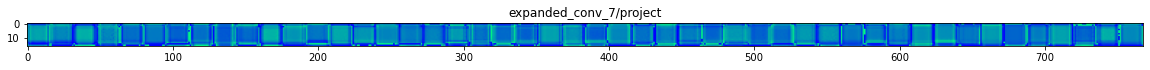

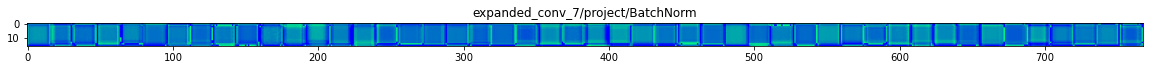

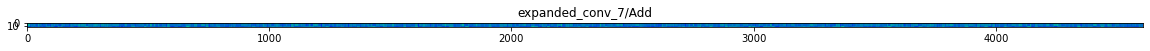

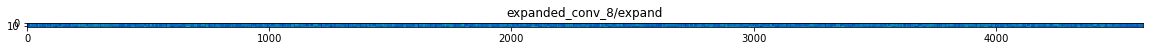

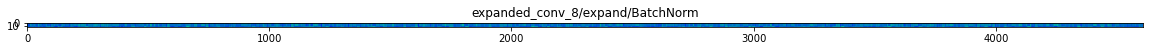

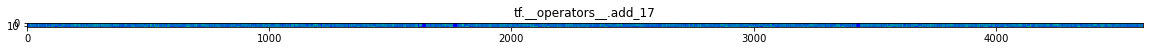

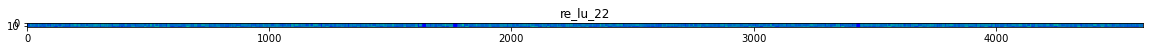

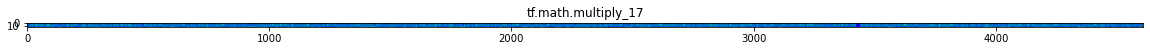

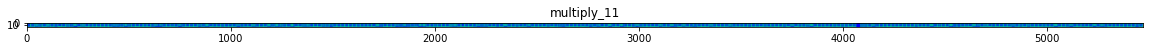

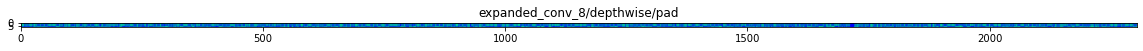

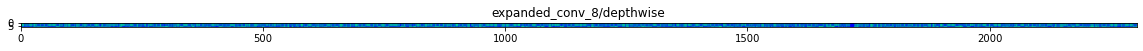

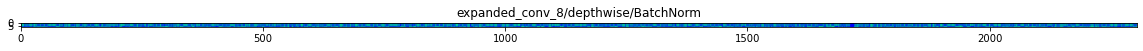

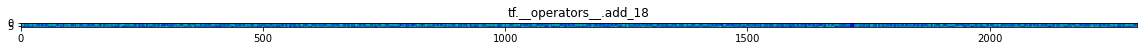

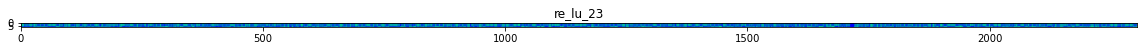

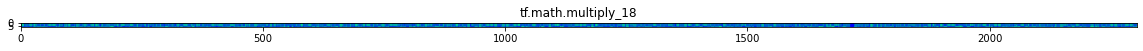

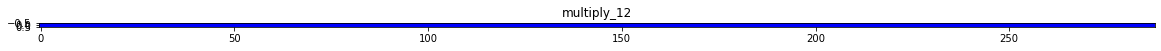

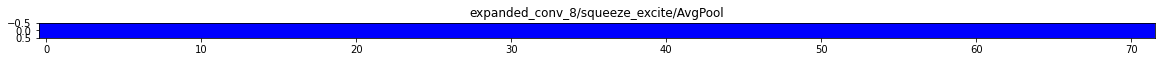

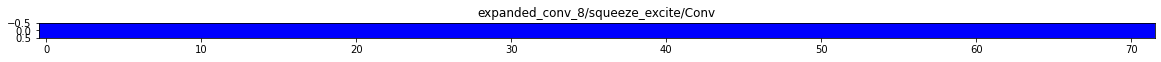

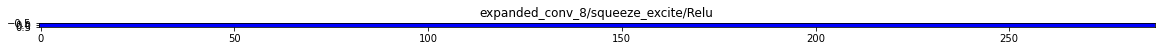

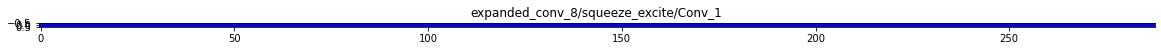

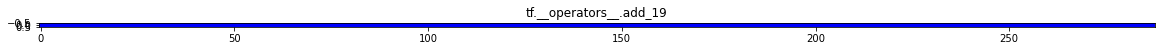

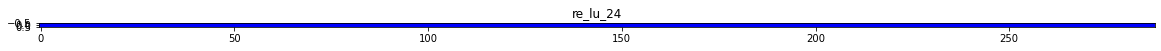

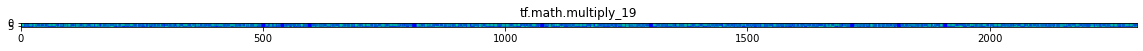

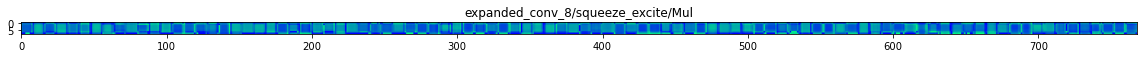

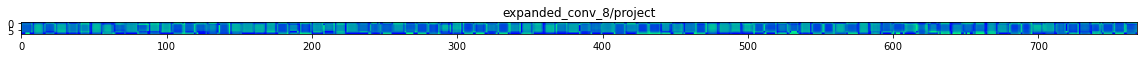

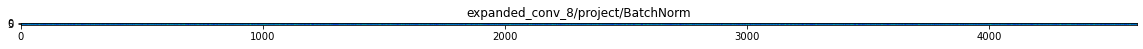

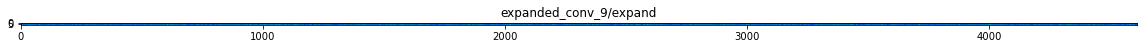

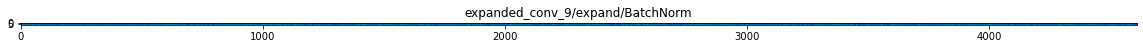

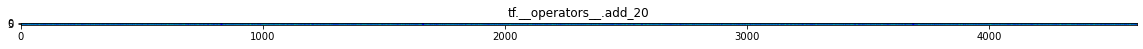

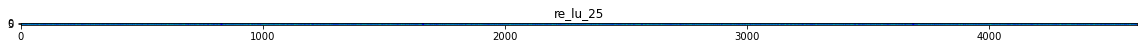

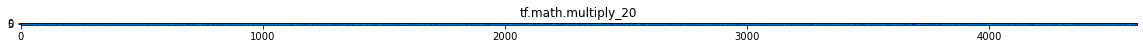

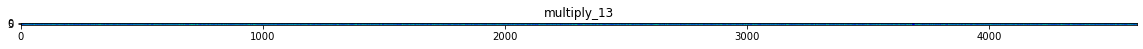

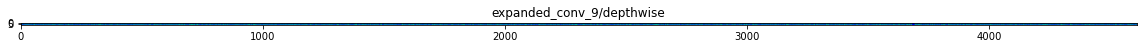

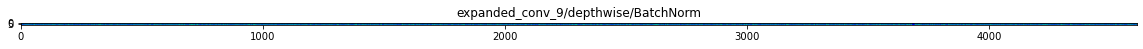

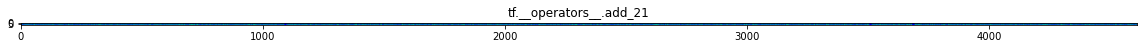

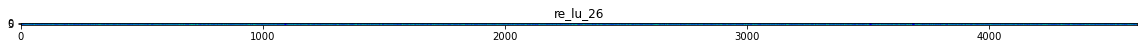

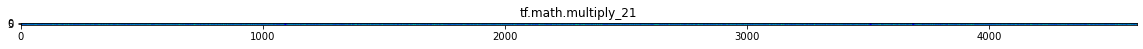

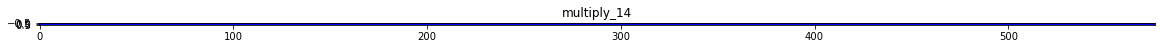

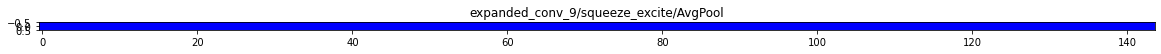

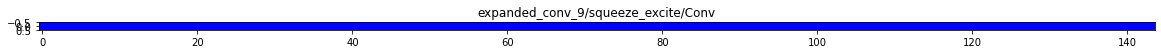

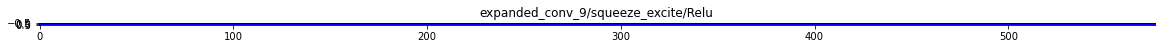

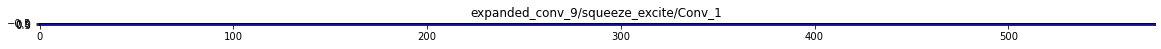

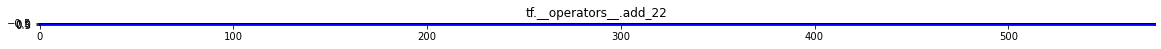

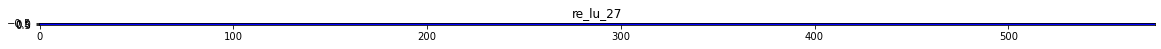

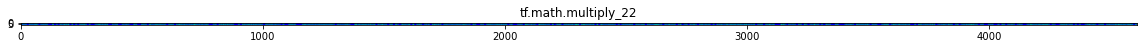

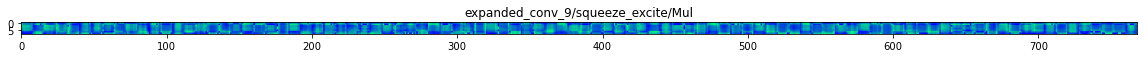

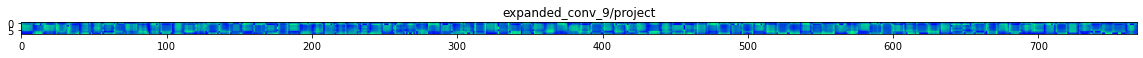

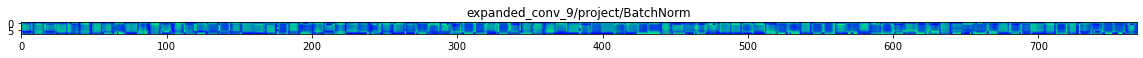

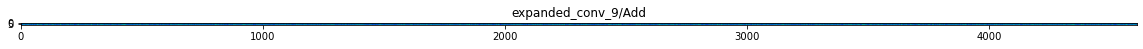

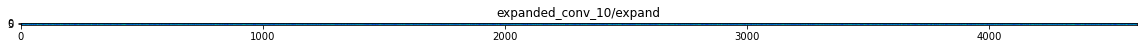

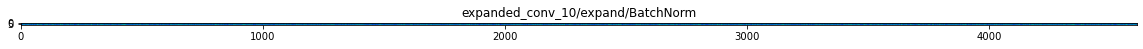

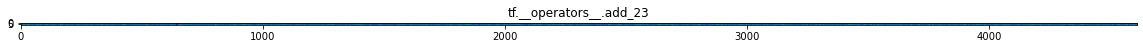

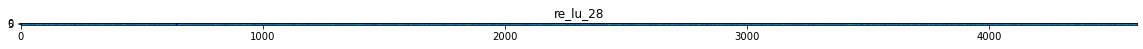

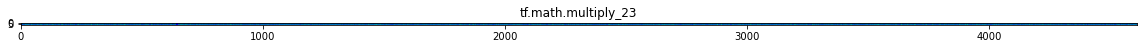

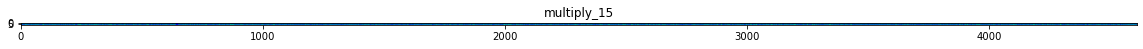

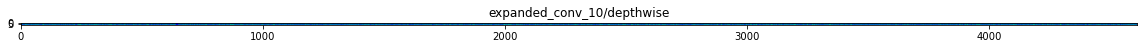

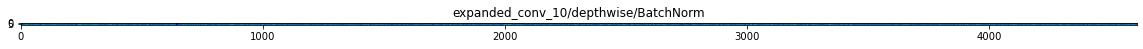

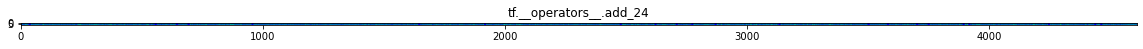

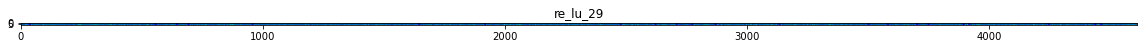

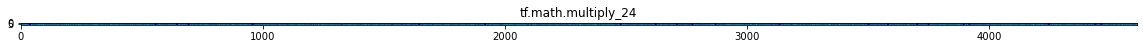

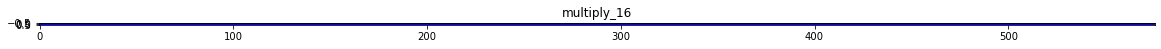

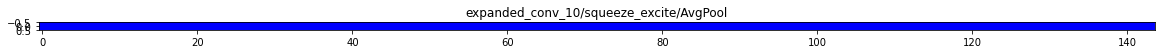

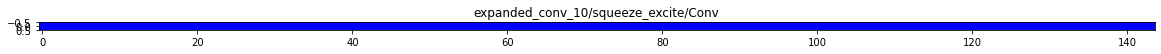

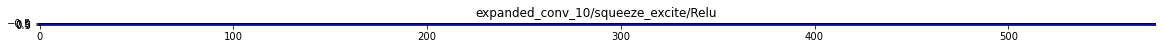

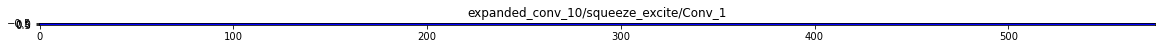

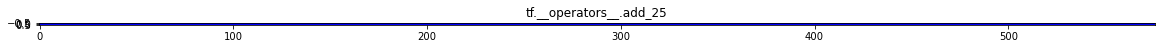

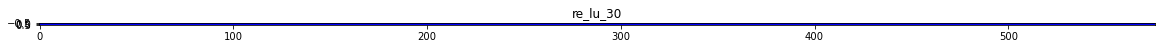

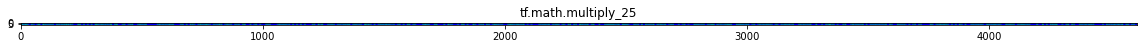

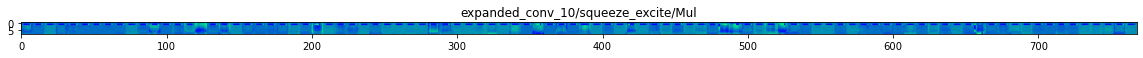

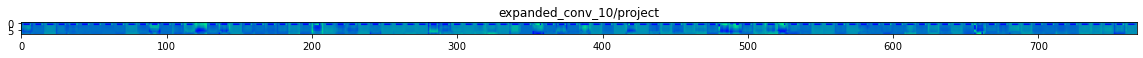

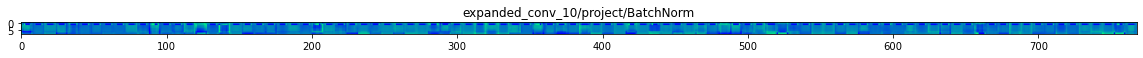

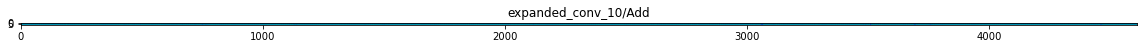

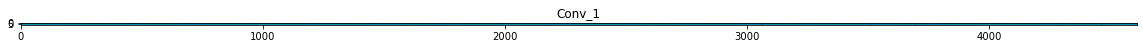

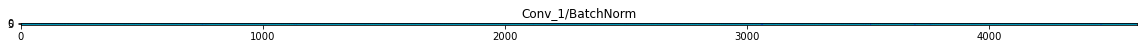

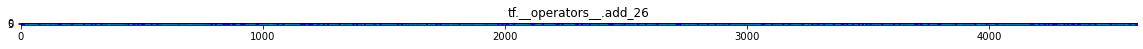

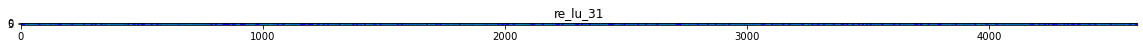

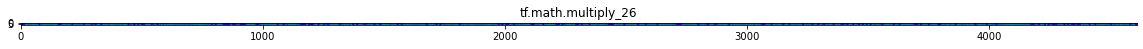

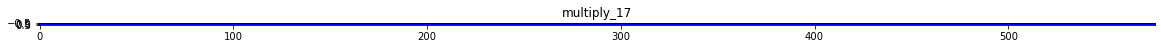

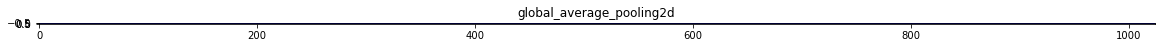

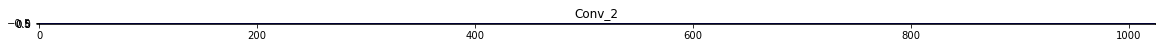

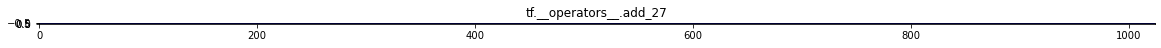

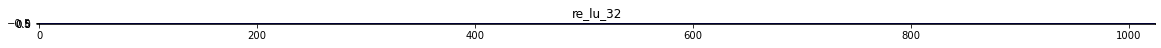

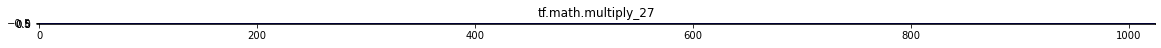

In [12]:
img_path='Dataset\Viral Pneumonia\person14_virus_44.jpeg' 

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))# Convert ht image to Array of dimension (150,150,3)
x   = tf.keras.preprocessing.image.img_to_array(img)                           
x   = x.reshape((1,) + x.shape)# Rescale by 1/255
x /= 255.0

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

np.seterr(invalid='ignore')

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:       
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 256).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='winter' )